# Diabetes Exploratory Data Analysis (EDA) and Prediction

**Overview**: This capstone project is centered around analyzing medical data related to diabetes and creating predictive models to forecast a person's diabetes status. The project includes exploratory data analysis (EDA), observations, and the development of various models to accurately predict the presence or absence of diabetes.  



### Content and dataset

The Behavioral Risk Factor Surveillance System (BRFSS) is a health-related telephone survey that is collected annually by the CDC. Each year, the survey collects responses from over 400,000 Americans on health-related risk behaviors, chronic health conditions, and the use of preventative services. It has been conducted every year since 1984. For this project, a cleaned csv of the dataset available on Kaggle for the year 2015 was used [link](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset). 
This original dataset contains responses from 441,455 individuals and has 330 features. These features are either questions directly asked of participants, or calculated variables based on individual participant responses. The original data set is available on CDC page [link](https://www.cdc.gov/brfss/annual_data/annual_2015.html)


This dataset, diabetes _ 012 _ health _ indicators _ BRFSS2015.csv is a clean dataset of 253,680 survey responses to the CDC's BRFSS2015. The target variable Diabetes_012 has 3 classes. 0 is for no diabetes or only during pregnancy, 1 is for prediabetes, and 2 is for diabetes. There is class imbalance in this dataset. This dataset has 21 feature variables


### 1. Understanding the Data - Exploratory Data Analysis (EDA)


#### Import Libraries and Read in the Data

Use pandas to read in the dataset `diabetes_012_health_indicators_BRFSS2015.csv` and assign to a meaningful variable name.

In [1]:
# ***********This is a Python 3 environment*********

#!pip3 install xgboost 
#!pip3 install np_utils
#!pip install --upgrade scikit-learn
#!pip install --upgrade imblearn

import pandas as pd
import numpy as np
from pandas import read_csv
import time

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go # visualization
import plotly.offline as py # visualization
from plotly.subplots import make_subplots
import plotly.figure_factory as ff # visualization

from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer
from imblearn.combine import SMOTEENN

from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score, cohen_kappa_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, average_precision_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn import set_config
set_config(display="diagram")

from warnings import filterwarnings
filterwarnings('ignore')


#Imports to support Neural Networks
#!pip install --ignore-installed --upgrade tensorflow
import tensorflow as tf
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.losses import binary_crossentropy, categorical_crossentropy
from keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam



In [2]:
# Load the dataset
df_raw = pd.read_csv('data/diabetes_012_health_indicators_BRFSS2015.csv')
df_raw.head(5)


Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0   
1          1.0      3.0       0.0       0.0       0.0  0.0   7.0        6.0   
2          1.0      5.0      30.0      30.0       1.0  0.0   9.0        4.0   
3          0.0      2.0       0.0       0.0       0.0  0.0  11.0        3.0   
4          0.0      2.0       3.0       0.0       0.0  0.0  11.0        5.0   

   Income  
0     3.0  
1     1.0  
2     8.0  
3     6.0  
4     4.0  

[5 rows x 22 columns]

In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [4]:
# Data over view of the diabetes dataset

def dataoveriew(df, message, disp_val):
    print(f'{message}:\n')
    print("Rows:", df.shape[0])
    print("\nNumber of features:", df.shape[1])
    print("\nFeatures:")
    print(df.columns.tolist())
    print("\nMissing values:", df.isnull().sum().values.sum())
    print("\nUnique values:")
    print(df.nunique())
    
    # for each column
    if disp_val == "y":
        for a in list(df.columns):
            # get a list of unique values
            n = df[a].unique()
            # if number of unique values is less than 30, print the values. Otherwise print the number of unique values
            if len(n)<30:
                print(a)
                print(n)
            else:
                print(a + ': ' +str(len(n)) + ' unique values')

In [5]:
dataoveriew(df_raw, 'Overiew of the raw full dataset','y')


Overiew of the raw full dataset:

Rows: 253680

Number of features: 22

Features:
['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']

Missing values: 0

Unique values:
Diabetes_012             3
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     84
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64

#### Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.

```
Input variables:
# Diabetes data:

**Diabetes_012** : you have diabetes (0,1,2) - target feature

0 = Not diabetic
1 = Pre diabetic
2 = diabetic


**HighBP** : Adults who have been told they have high blood pressure by a doctor, nurse, or other health professional (0,1)
**HighChol** : Have you EVER been told by a doctor, nurse or other health professional that your blood cholesterol is high? (0,1)
**CholCheck** : Cholesterol check within past five years (0,1)
**BMI** : Body Mass Index (BMI)
**Smoker** : Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] (0,1)
**Stroke** : (Ever told) you had a stroke. (0,1)
**HeartDiseaseorAttack** : Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI) (0,1)
**PhysActivity** : Adults who reported doing physical activity or exercise during the past 30 days other than their regular job (0,1)
**Fruits** : Consume Fruit 1 or more times per day (0,1)
**Veggies** : Consume Vegetables 1 or more times per day (0,1)
**HvyAlcoholConsump** : Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)(0,1)
**AnyHealthcare** : Do you have any kind of health care coverage, including health insurance, prepaid plans such as HMOs, or government plans such as Medicare, or Indian Health Service? (0,1)
**NoDocbcCost** : Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? (0,1)
**GenHlth** : Would you say that in general your health is: rate (1 ~ 5)
**MentHlth** : Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? (0 ~ 30)
**PhysHlth** : Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0 ~ 30)
**DiffWalk** : Do you have serious difficulty walking or climbing stairs? (0,1)
**Sex** : Indicate sex of respondent (0,1) (Female or Male)
**Age** : Fourteen-level age category (1 ~ 14)
**Education** : What is the highest grade or year of school you completed? (1 ~ 6)
**Income** : Is your annual household income from all sources: (If respondent refuses at any income level, code "Refused.") (1 ~ 8)
```

#### Examin and clean the data - check missed or and duplicate data

##### There are no missing values in this dataset. dropping duplicate data



In [6]:
# Remove duplicate records

#Checking for duplicated rows
print("Duplicate rows:", df_raw.duplicated().sum())

df_raw.drop_duplicates(inplace=True)

#overview of the data

dataoveriew(df_raw, 'Overiew of the raw dataset after removal of duplicate records','n')

Duplicate rows: 23899
Overiew of the raw dataset after removal of duplicate records:

Rows: 229781

Number of features: 22

Features:
['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']

Missing values: 0

Unique values:
Diabetes_012             3
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     84
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education     

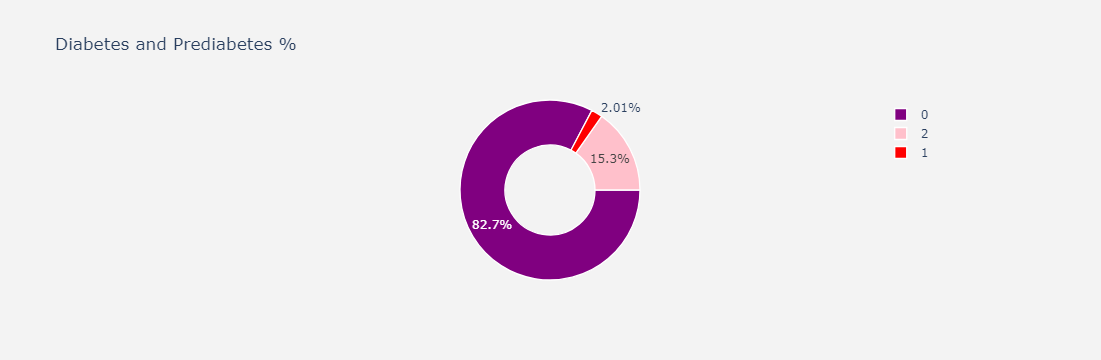

In [7]:
# Data Exploration and verify if data is balanced

trace = go.Pie(labels = df_raw["Diabetes_012"].value_counts().keys().tolist(),
               values = df_raw["Diabetes_012"].value_counts().values.tolist(),
               marker = dict(colors = ['purple', 'pink','red'],
                             line = dict(color = "white", width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Diabetes and Prediabetes %",
                        plot_bgcolor = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )
data = [trace]
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

##### This dataset has imbalanced with only 17.3% population has diabetes (15.3%) or prediabetes (2. 01%) condition and rest of the 82.7% population is with no diabetes condition.



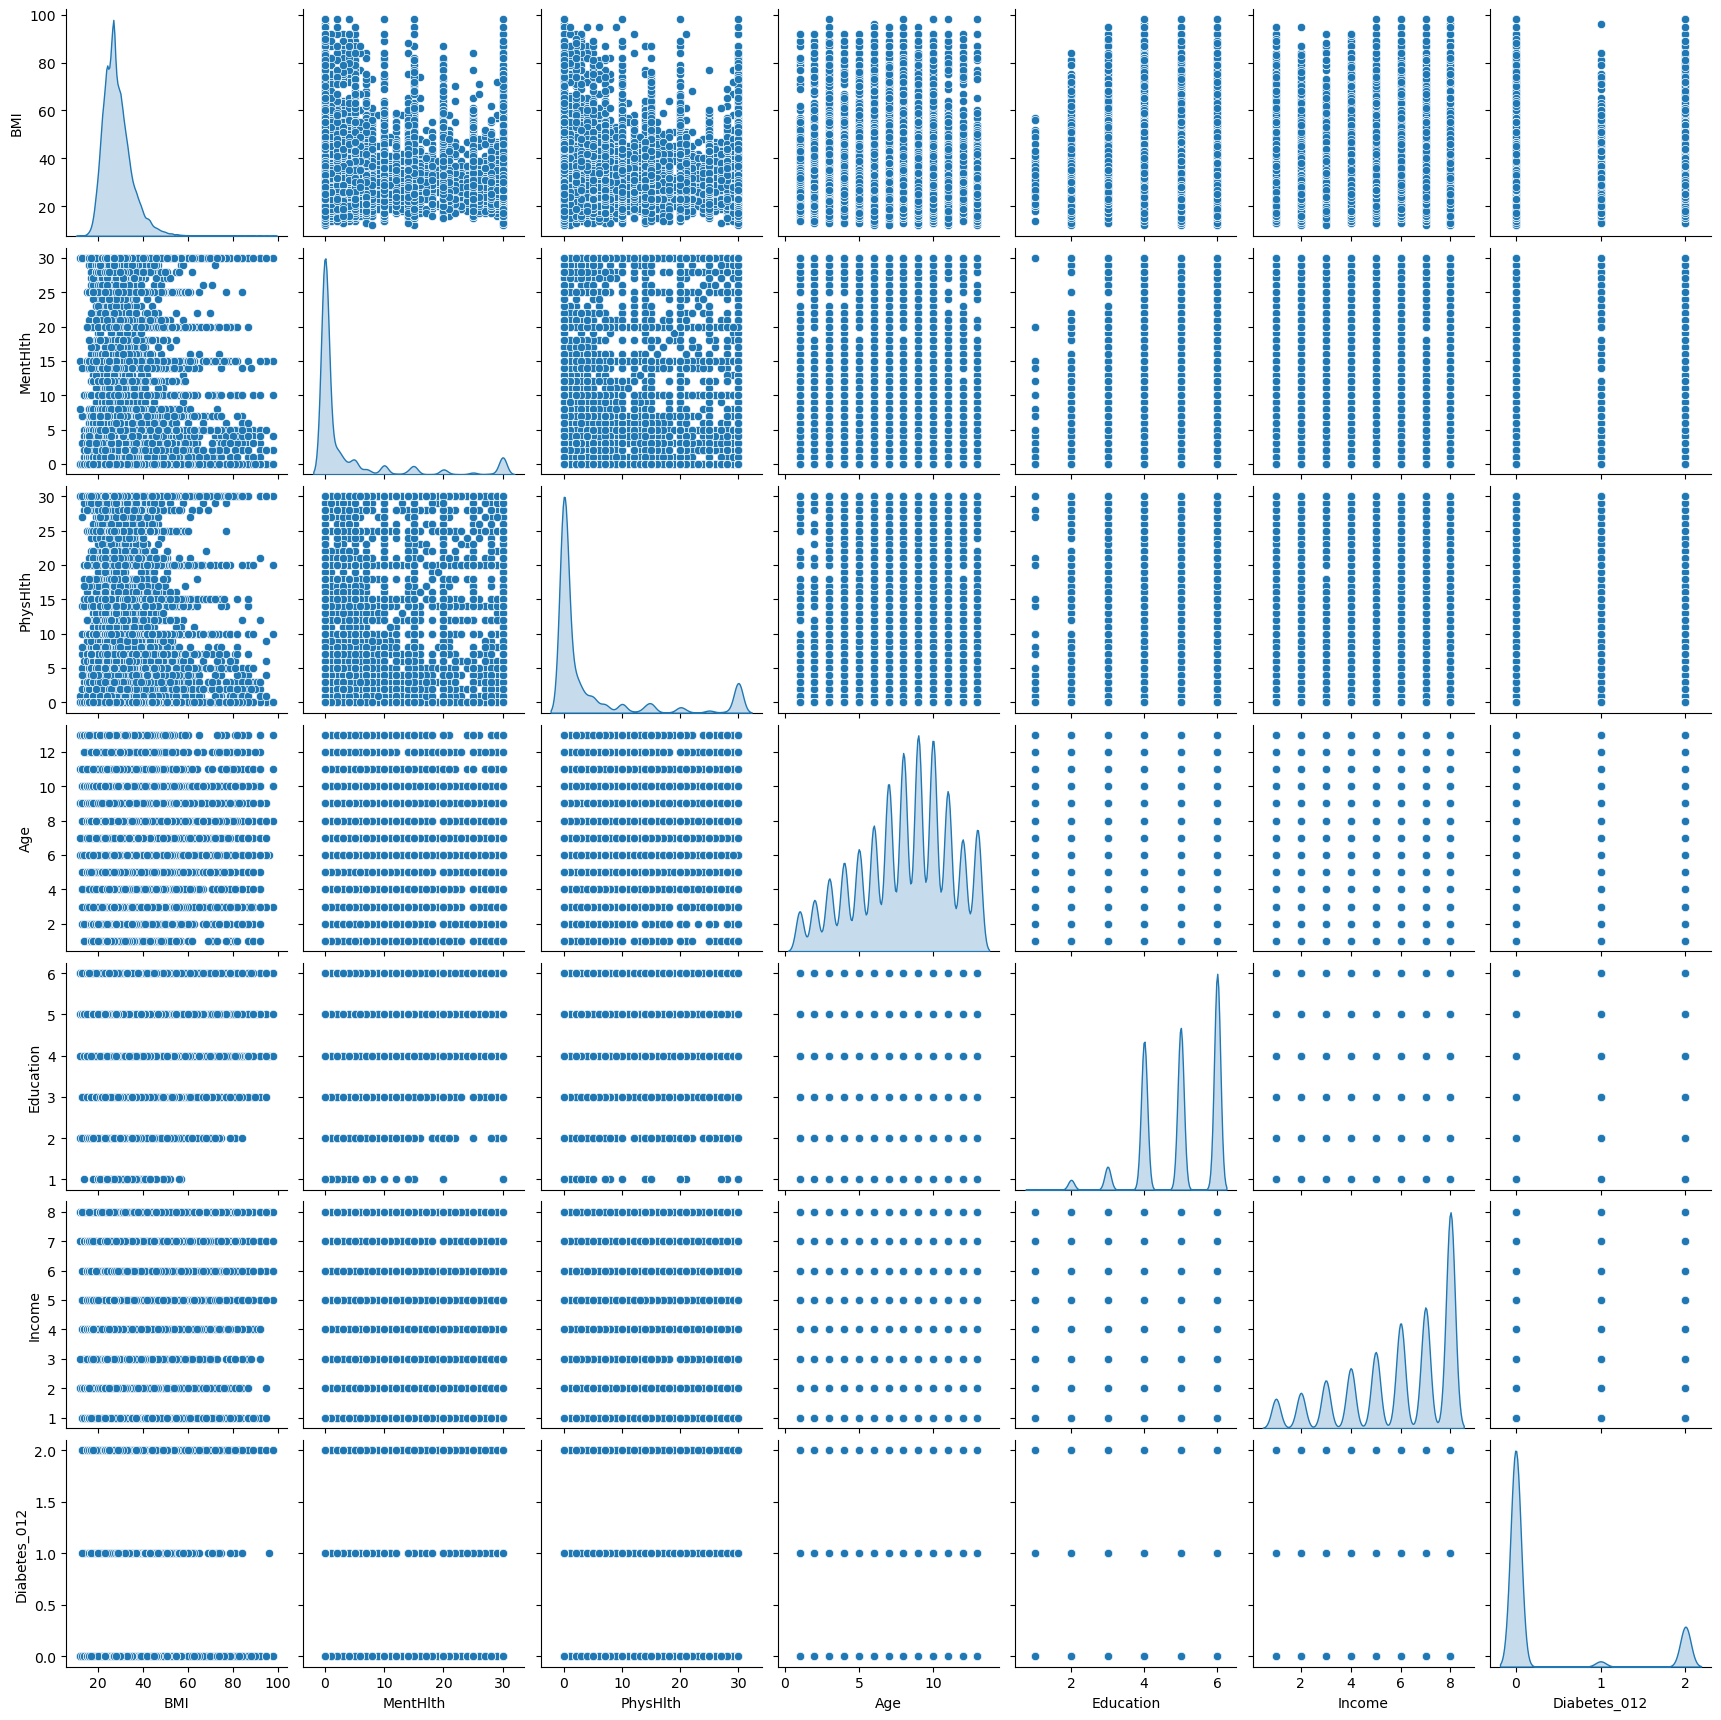

In [8]:
#Analyse data

#Separating columns to be visualized
out_cols = list(set(df_raw.nunique()[df_raw.nunique()<6].keys().tolist()
                    + df_raw.select_dtypes(include='object').columns.tolist()))
viz_cols = [x for x in df_raw.columns if x not in out_cols] + ['Diabetes_012']
#sns.set_palette('summer_r')
sns.pairplot(df_raw[viz_cols], diag_kind="kde")
plt.show()

In [9]:
#Describe the numeric columns 

df_raw.describe().T

count       mean       std   min   25%   50%   75%  \
Diabetes_012          229781.0   0.325627  0.724623   0.0   0.0   0.0   0.0   
HighBP                229781.0   0.454441  0.497921   0.0   0.0   0.0   1.0   
HighChol              229781.0   0.441760  0.496598   0.0   0.0   0.0   1.0   
CholCheck             229781.0   0.959535  0.197047   0.0   1.0   1.0   1.0   
BMI                   229781.0  28.685670  6.786360  12.0  24.0  27.0  32.0   
Smoker                229781.0   0.465661  0.498821   0.0   0.0   0.0   1.0   
Stroke                229781.0   0.044756  0.206767   0.0   0.0   0.0   0.0   
HeartDiseaseorAttack  229781.0   0.103216  0.304241   0.0   0.0   0.0   0.0   
PhysActivity          229781.0   0.733355  0.442206   0.0   0.0   1.0   1.0   
Fruits                229781.0   0.612966  0.487073   0.0   0.0   1.0   1.0   
Veggies               229781.0   0.794813  0.403839   0.0   1.0   1.0   1.0   
HvyAlcoholConsump     229781.0   0.060710  0.238798   0.0   0.0   0.0   0.0   
AnyHealthcare         229781.0   0.946075  0.225871   0.0   1.0   1.0   1.0   
NoDocbcCost           229781.0   0.092810  0.290167   0.0   0.0   0.0   0.0   
GenHlth               229781.0   2.601151  1.064685   1.0   2.0   3.0   3.0   
MentHlth              229781.0   3.505373  7.713725   0.0   0.0   0.0   2.0   
PhysHlth              229781.0   4.675178  9.046568   0.0   0.0   0.0   4.0   
DiffWalk              229781.0   0.185507  0.388709   0.0   0.0   0.0   0.0   
Sex                   229781.0   0.439231  0.496295   0.0   0.0   0.0   1.0   
Age                   229781.0   8.086582  3.093809   1.0   6.0   8.0  10.0   
Education             229781.0   4.980568  0.992895   1.0   4.0   5.0   6.0   
Income                229781.0   5.890383  2.092477   1.0   5.0   6.0   8.0   

                       max  
Diabetes_012           2.0  
HighBP                 1.0  
HighChol               1.0  
CholCheck              1.0  
BMI                   98.0  
Smoker                 1.0  
Stroke                 1.0  
HeartDiseaseorAttack   1.0  
PhysActivity           1.0  
Fruits                 1.0  
Veggies                1.0  
HvyAlcoholConsump      1.0  
AnyHealthcare          1.0  
NoDocbcCost            1.0  
GenHlth                5.0  
MentHlth              30.0  
PhysHlth              30.0  
DiffWalk               1.0  
Sex                    1.0  
Age                   13.0  
Education              6.0  
Income                 8.0

[Text(0.5, 1.0, 'Box plot of BMI')]

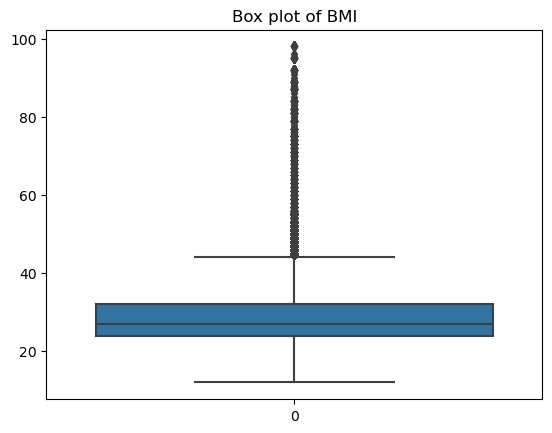

In [10]:
#check distribution of BMI

sns.boxplot(df_raw['BMI']).set(title='Box plot of BMI') 

In [11]:
# Remove outliers of BMI

percentile25 = df_raw['BMI'].quantile(0.25)
percentile75 = df_raw['BMI'].quantile(0.75)
iqr = percentile75 - percentile25

upper_limit = percentile75 + 2.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

df_raw[df_raw['BMI'] > upper_limit]
df_raw[df_raw['BMI'] < lower_limit]

#clean dataset by removing BMI outliers - remove records with BMI > 52

df_raw = df_raw[df_raw['BMI'] < upper_limit]
df_raw.shape

(227859, 22)

[Text(0.5, 1.0, 'Box plot of BMI')]

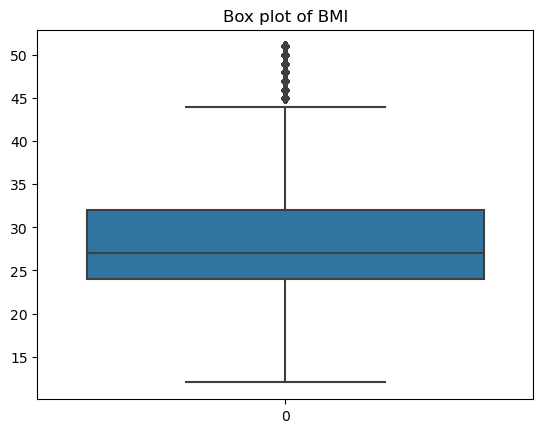

In [12]:
#check distribution of BMI after removing outliers

sns.boxplot(df_raw['BMI']).set(title='Box plot of BMI') 

Text(0.5, 1.0, 'High Blood Pressure(BP) correlation to the Diabetes')

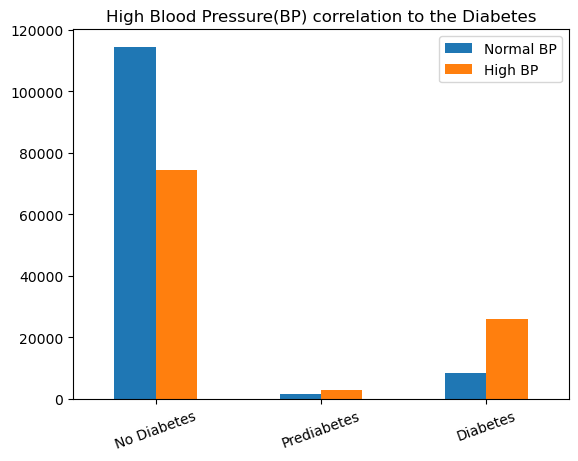

In [13]:
# visualize HighBP correlation to the diabetes
#sns.countplot(x='Diabetes_012', hue='HighBP', data=df_raw)
hbp= pd.crosstab(df_raw.Diabetes_012, df_raw.HighBP)
ax = hbp.plot(kind='bar')
ax.set(xlabel=None)
ax.set_xticklabels(['No Diabetes', 'Prediabetes','Diabetes'], rotation=20)
ax.legend(['Normal BP', 'High BP'])
plt.title('High Blood Pressure(BP) correlation to the Diabetes')

(15.0, 50.0)

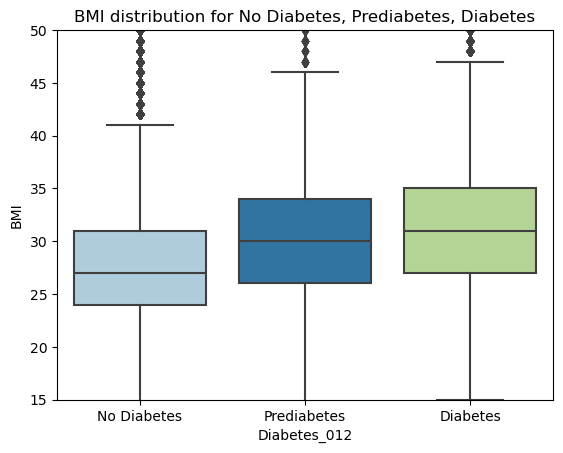

In [14]:
# visualize BMI correlation to the diabetes
ax = sns.boxplot(data=df_raw, x='Diabetes_012', y='BMI', palette='Paired')
ax.set(title = 'BMI distribution for No Diabetes, Prediabetes, Diabetes')
ax.set_xticklabels(['No Diabetes', 'Prediabetes', 'Diabetes'])
plt.ylim(15, 50)

Text(0.5, 1.0, 'High Cholestrol correlation to the Diabetes')

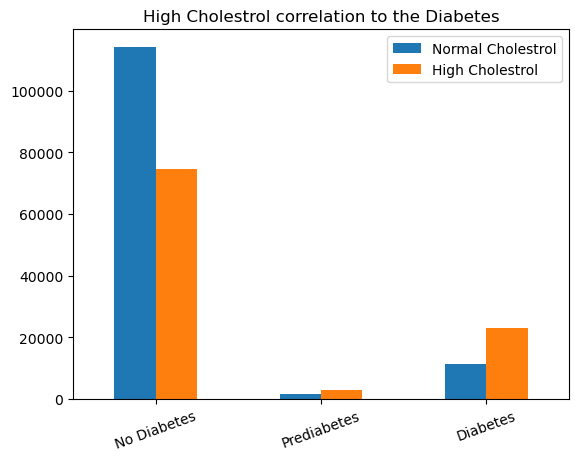

In [15]:
# visualize High Cholestrol correlation to the diabetes
#sns.countplot(x='Diabetes_012', hue='HighChol', data=df_raw)
hchl= pd.crosstab(df_raw.Diabetes_012, df_raw.HighChol)
ax = hchl.plot(kind='bar')
ax.set(xlabel=None)
ax.set_xticklabels(['No Diabetes', 'Prediabetes','Diabetes'], rotation=20)
ax.legend(['Normal Cholestrol', 'High Cholestrol'])
plt.title('High Cholestrol correlation to the Diabetes')

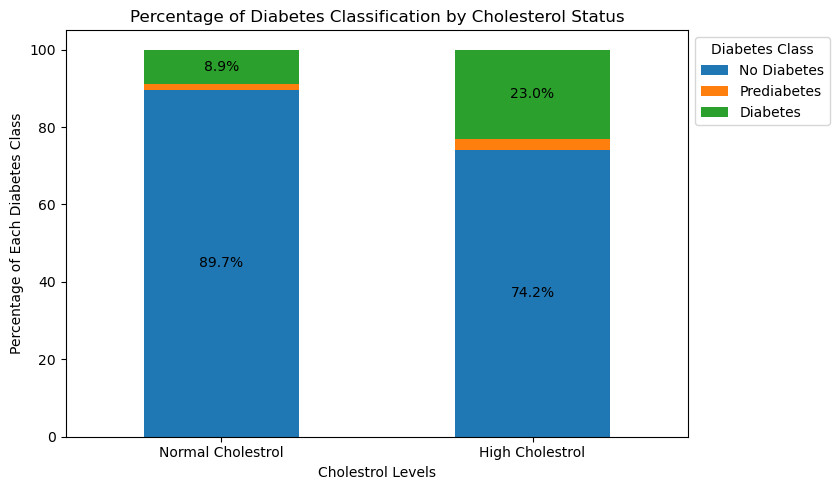

In [16]:
# Plot Percentage of Diabetes Classification by Cholesterol

diabetes_percentages = df_raw.groupby(['HighChol', 'Diabetes_012']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack()
# Create a bar plot
ax = diabetes_percentages.plot(kind='bar', stacked=True, figsize=(10, 5))

# Adding the percentage text on the bars
for c in ax.containers:
    # Optional: if the segment is too small, don't place a label
    labels = [f'{w:.1f}%' if (w := v.get_height()) > 5 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='center')

# Adding titles and labels
plt.title('Percentage of Diabetes Classification by Cholesterol Status')
plt.xlabel('Cholestrol Levels')
plt.ylabel('Percentage of Each Diabetes Class')
plt.xticks(ticks=[0, 1], labels=['Normal Cholestrol', 'High Cholestrol'], rotation=0)

# Move the legend to the right top and outside of the plot area
plt.legend(title='Diabetes Class', labels=['No Diabetes', 'Prediabetes', 'Diabetes'], loc='upper left', bbox_to_anchor=(1,1))

# Adjust layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust the rect to make space for the legend

# Show plot with the adjusted legend
plt.show()

In [17]:
df_raw.cov()

Diabetes_012    HighBP  HighChol  CholCheck        BMI  \
Diabetes_012              0.521354  0.093634  0.072788   0.010748   0.974434   
HighBP                    0.093634  0.247805  0.070373   0.010911   0.628069   
HighChol                  0.072788  0.070373  0.246606   0.009298   0.305542   
CholCheck                 0.010748  0.010911  0.009298   0.038899   0.054446   
BMI                       0.974434  0.628069  0.305542   0.054446  34.768154   
Smoker                    0.016998  0.018619  0.018424  -0.000360  -0.014403   
Stroke                    0.014999  0.012822  0.009180   0.001142   0.015243   
HeartDiseaseorAttack      0.037577  0.030466  0.026648   0.003013   0.082389   
PhysActivity             -0.031951 -0.022408 -0.013690  -0.000357  -0.335666   
Fruits                   -0.008685 -0.004528 -0.006367   0.001735  -0.201719   
Veggies                  -0.012556 -0.008513 -0.005385  -0.000054  -0.112482   
HvyAlcoholConsump        -0.011516 -0.001651 -0.002264  -0.000999  -0.086405   
AnyHealthcare             0.004119  0.005872  0.005904   0.005151  -0.005918   
NoDocbcCost               0.004733  0.000208  0.000397  -0.003120   0.077919   
GenHlth                   0.216550  0.142994  0.099236   0.013214   1.357688   
MentHlth                  0.304506  0.134207  0.189256  -0.003463   2.913999   
PhysHlth                  1.017615  0.635777  0.492436   0.071784   5.120971   
DiffWalk                  0.057657  0.040161  0.026048   0.003716   0.410276   
Sex                       0.012082  0.011890  0.005707  -0.002360   0.124219   
Age                       0.416396  0.526061  0.405781   0.058775  -0.681101   
Education                -0.076266 -0.055161 -0.024271  -0.001901  -0.472778   
Income                   -0.218505 -0.143285 -0.063689   0.000944  -0.788663   

                        Smoker    Stroke  HeartDiseaseorAttack  PhysActivity  \
Diabetes_012          0.016998  0.014999              0.037577     -0.031951   
HighBP                0.018619  0.012822              0.030466     -0.022408   
HighChol              0.018424  0.009180              0.026648     -0.013690   
CholCheck            -0.000360  0.001142              0.003013     -0.000357   
BMI                  -0.014403  0.015243              0.082389     -0.335666   
Smoker                0.248854  0.005605              0.016001     -0.014886   
Stroke                0.005605  0.042721              0.012513     -0.005395   
HeartDiseaseorAttack  0.016001  0.012513              0.092484     -0.009753   
PhysActivity         -0.014886 -0.005395             -0.009753      0.194742   
Fruits               -0.015061 -0.000459             -0.001050      0.026776   
Veggies              -0.002890 -0.002746             -0.003331      0.024083   
HvyAlcoholConsump     0.011456 -0.001064             -0.002594      0.002408   
AnyHealthcare        -0.001607  0.000629              0.001792      0.002396   
NoDocbcCost           0.005465  0.001699              0.001916     -0.005812   
GenHlth               0.072088  0.037327              0.079648     -0.110129   
MentHlth              0.297751  0.098618              0.121757     -0.352041   
PhysHlth              0.453728  0.262384              0.465523     -0.780929   
DiffWalk              0.021043  0.013566              0.023859     -0.039634   
Sex                   0.023944  0.000387              0.013634      0.007162   
Age                   0.166196  0.081996              0.210915     -0.120605   
Education            -0.067415 -0.013126             -0.024831      0.074958   
Income               -0.099945 -0.050535             -0.077619      0.151440   

                        Fruits  ...  AnyHealthcare  NoDocbcCost   GenHlth  \
Diabetes_012         -0.008685  ...       0.004119     0.004733  0.216550   
HighBP               -0.004528  ...       0.005872     0.000208  0.142994   
HighChol             -0.006367  ...       0.005904     0.000397  0.099236   
CholCheck             0.001735  

In [18]:
# List of binary, ordinal & numerical features
target = ['Diabetes_012']
features_binary = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
                   'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']
features_ordinal = ['GenHlth', 'Age', 'Education', 'Income']
features_numerical = ['BMI', 'MentHlth', 'PhysHlth']

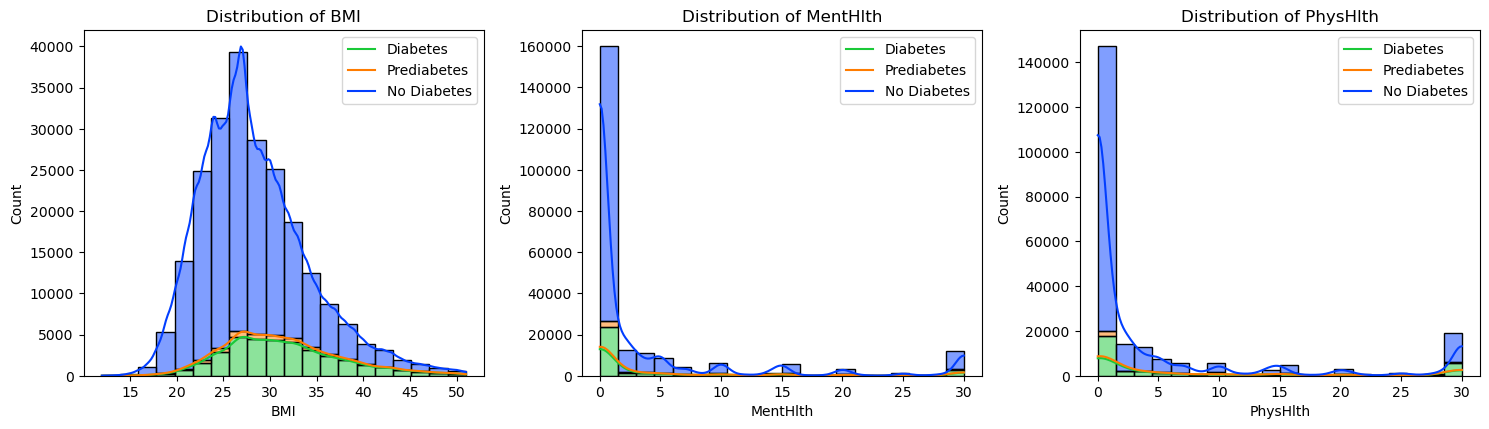

In [19]:
# Visualize numerical features via histplots

plt.figure(figsize=(15, 8))

for i, feature in enumerate(features_numerical, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_raw, x=feature, kde=True, bins=20, hue='Diabetes_012', multiple='stack', palette='bright')
    plt.title(f'Distribution of {feature}')
    plt.legend(['Diabetes', 'Prediabetes','No Diabetes'])
 

plt.tight_layout()
plt.show()

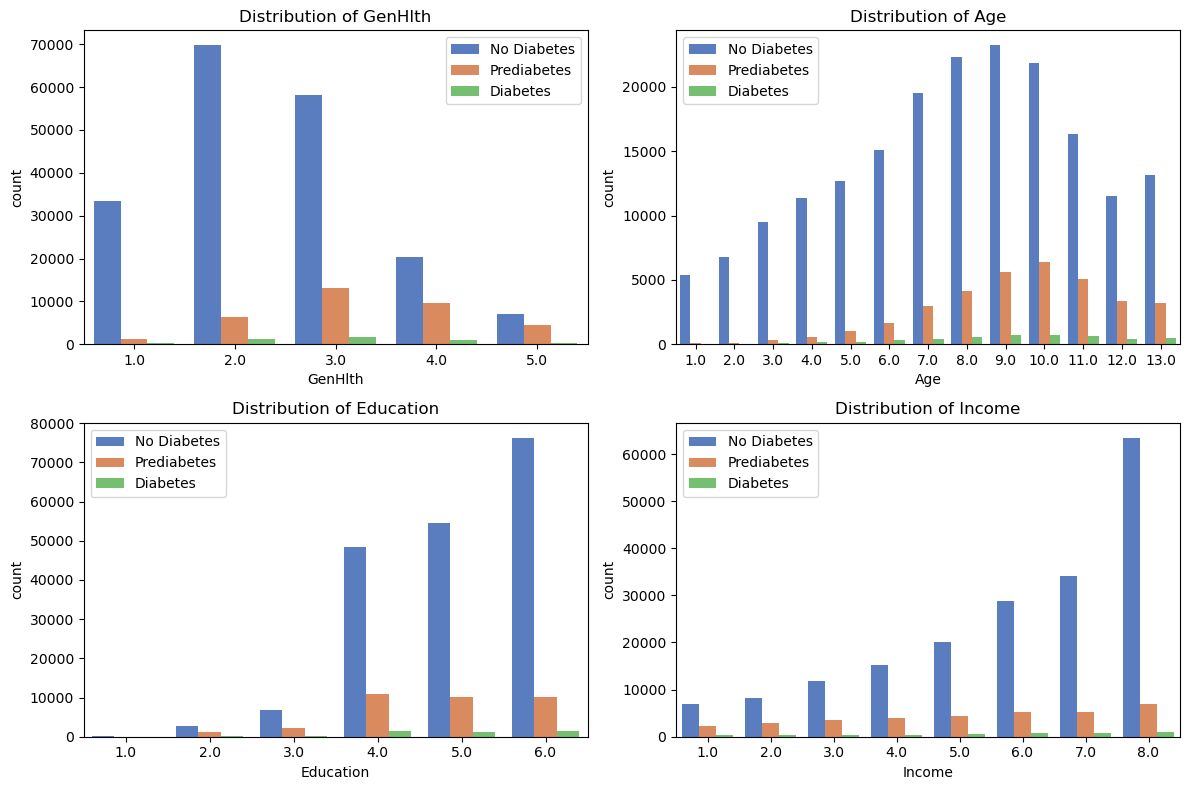

In [20]:
# Visualize ordinal features via countplots
# Set up subplots for plotting
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
fig.subplots_adjust(hspace=0.5)

# Loop through ordinal features and create plots
for i, feature in enumerate(features_ordinal):
    row, col = i // 2, i % 2
    sns.countplot(x=feature, hue= df_raw.Diabetes_012.apply(str), data=df_raw, ax=axes[row, col], palette='muted')
    axes[row, col].set_title(f'Distribution of {feature}')
    axes[row, col].legend(['No Diabetes', 'Prediabetes','Diabetes'])

plt.tight_layout()
plt.show()

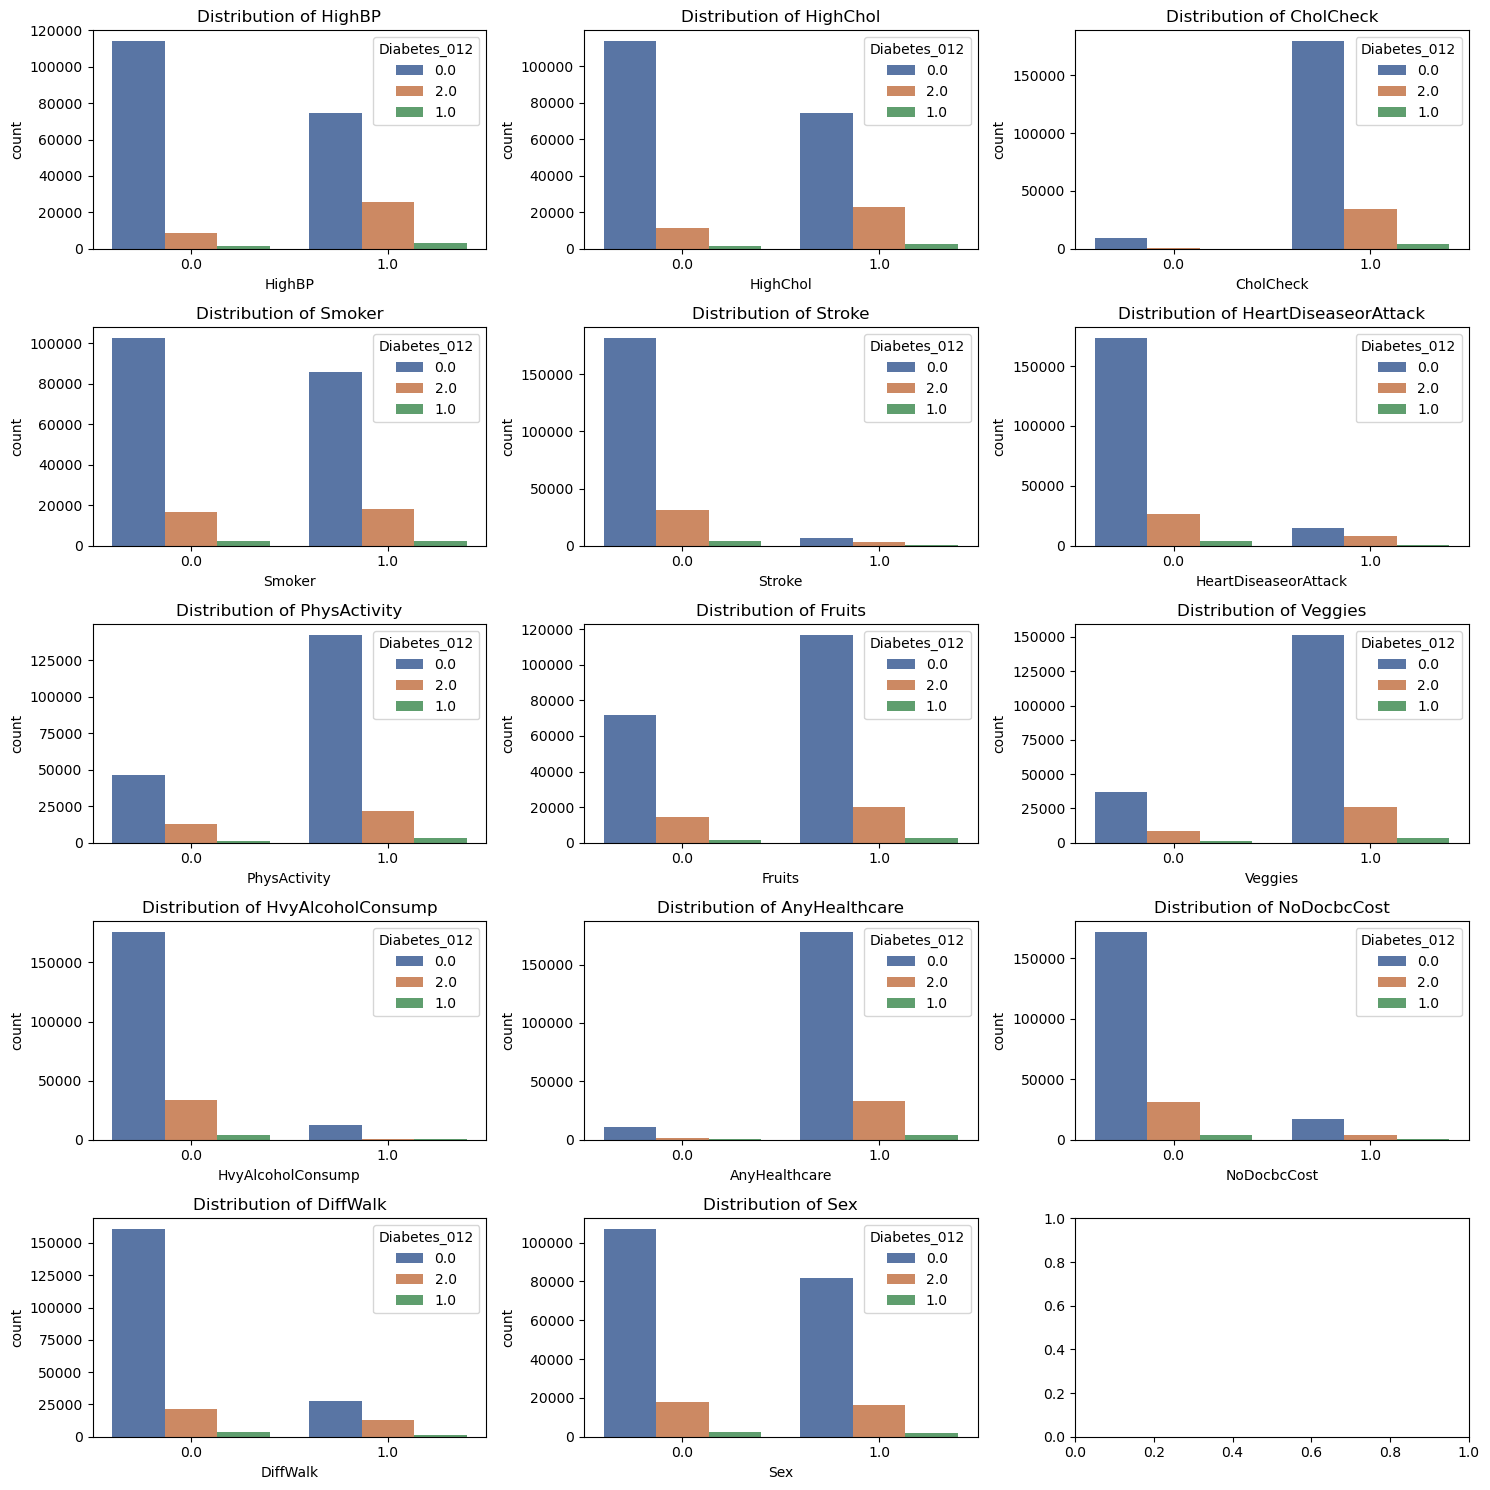

In [21]:
# Loop through binary features and create plots

# Set up subplots for plotting
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5)

for i, feature in enumerate(features_binary):
    row, col = i // 3, i % 3
    sns.countplot(x=feature, hue= df_raw.Diabetes_012.apply(str), data=df_raw, ax=axes[row, col], palette='deep')
    axes[row, col].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

Correlation Matrix 



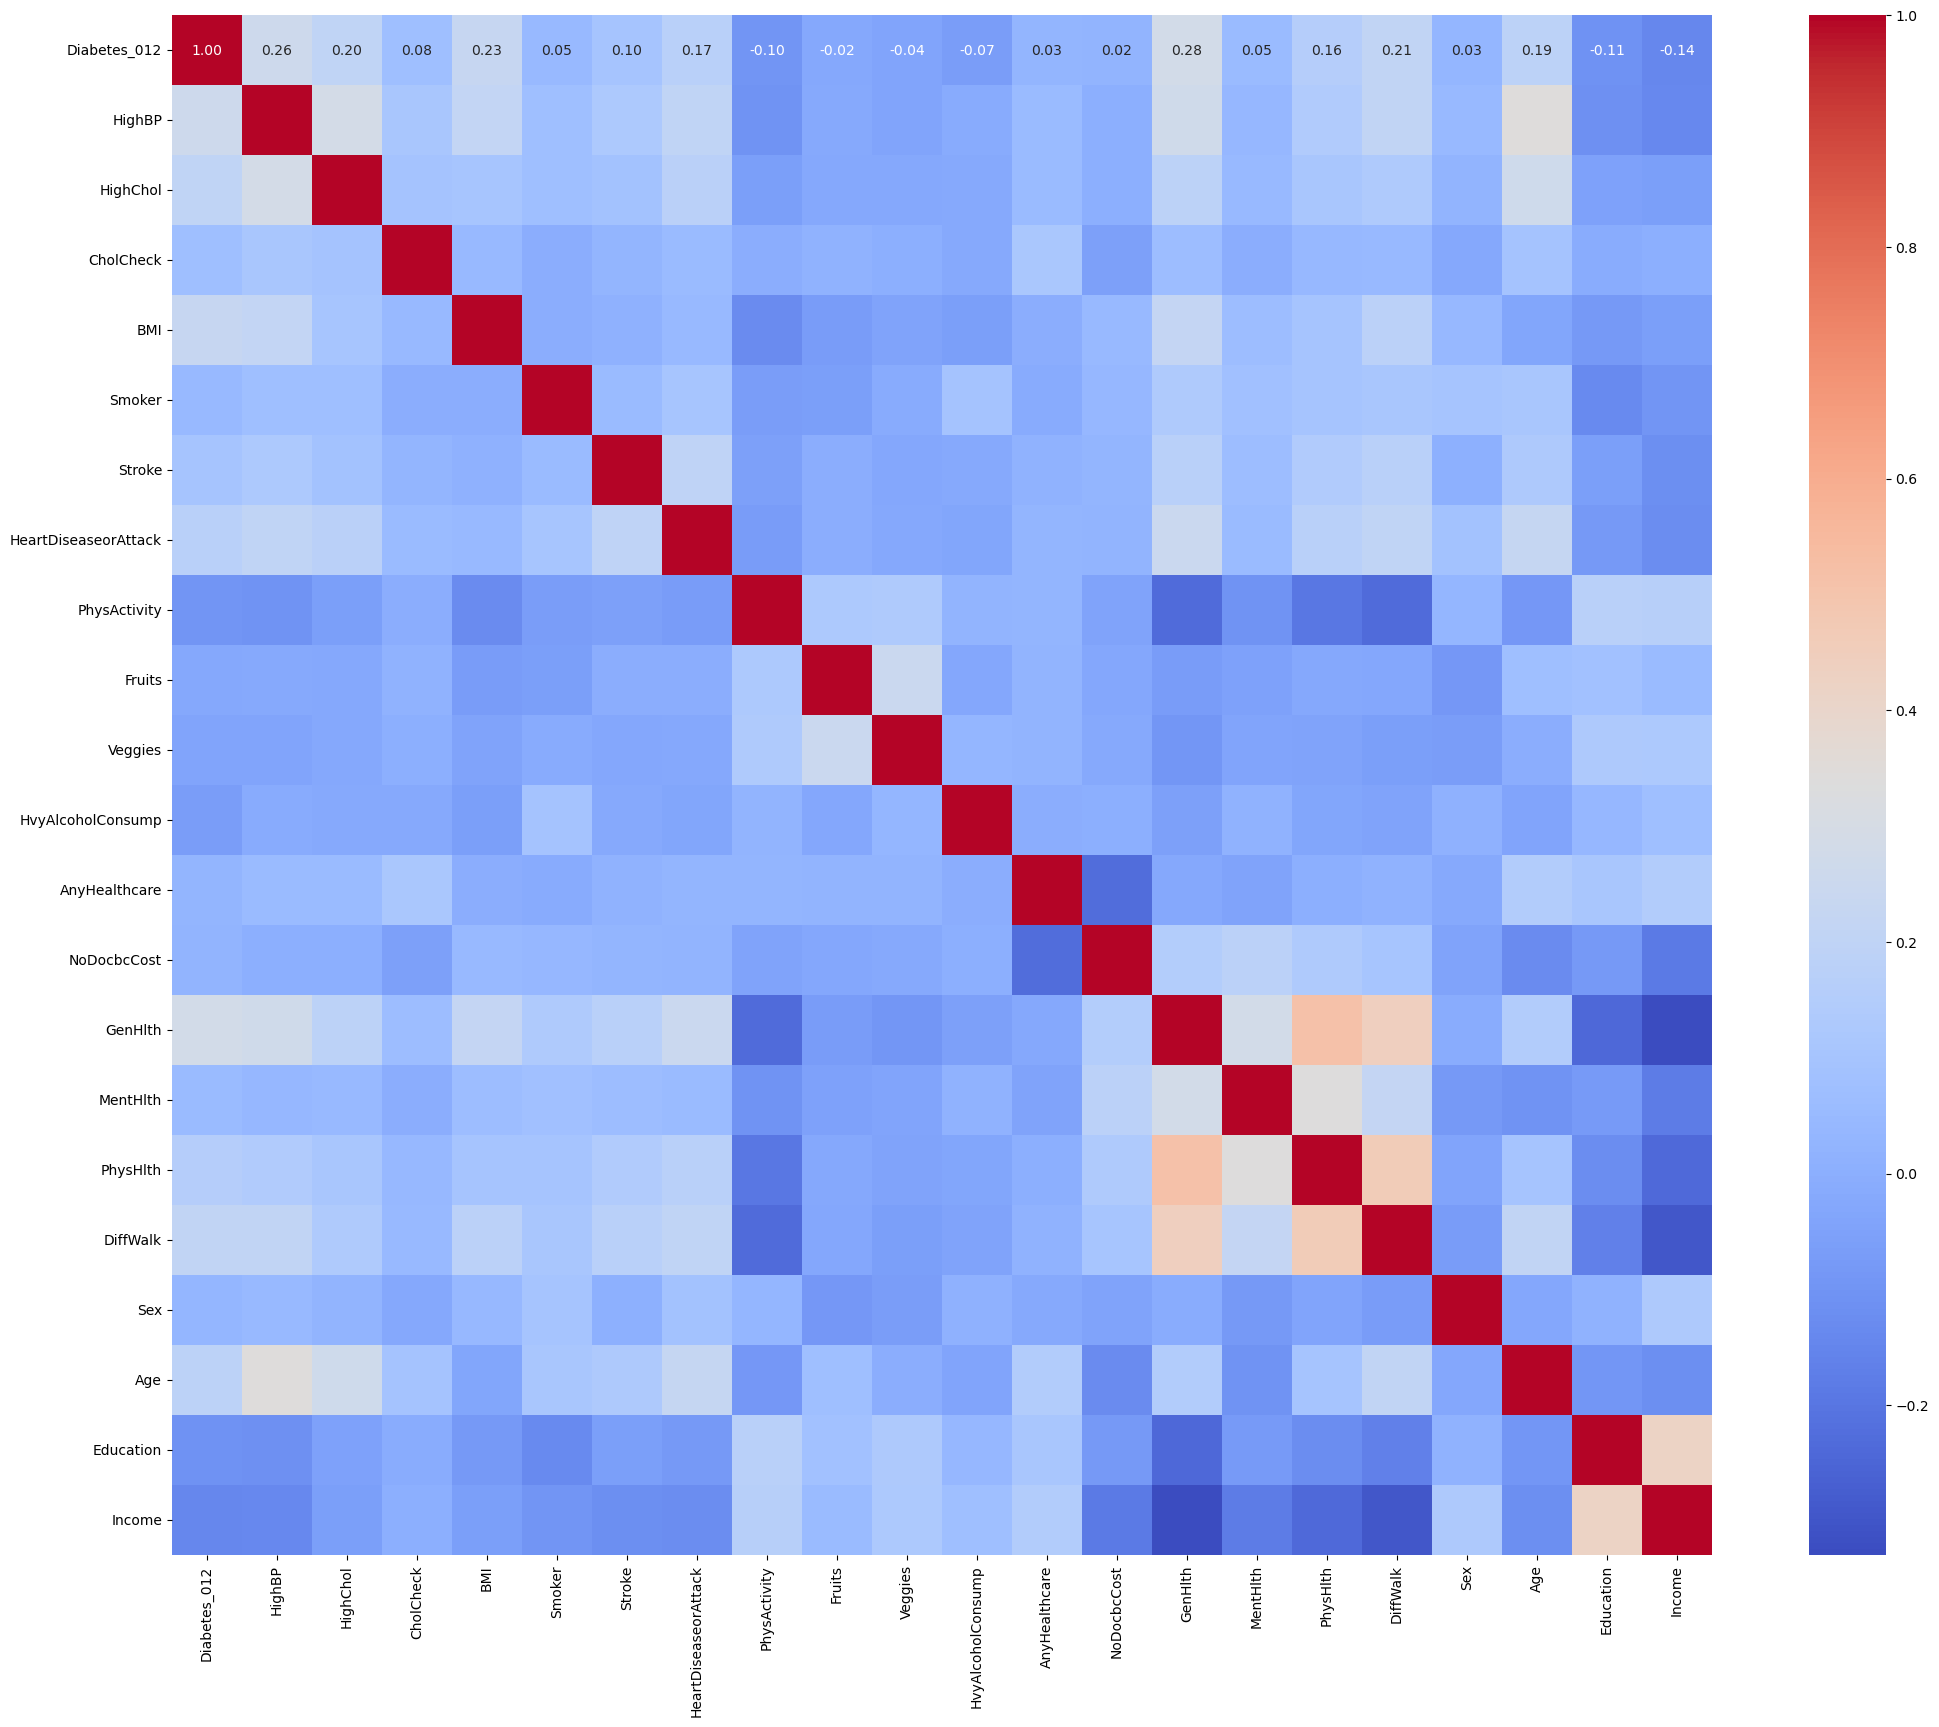

In [22]:
#Correlation - Heat map

print("Correlation Matrix","\n")    
correlation=df_raw.corr(method="pearson")
plt.figure(figsize=(25,20))
sns.heatmap(correlation,vmax=1,square=True,annot=True,fmt=".2f", cmap='coolwarm')
plt.show()

In [23]:
df_raw.corr()['Diabetes_012'].sort_values()

Income                 -0.144894
Education              -0.106442
PhysActivity           -0.100274
HvyAlcoholConsump      -0.066647
Veggies                -0.043086
Fruits                 -0.024705
NoDocbcCost             0.022642
AnyHealthcare           0.025300
Sex                     0.033712
Smoker                  0.047191
MentHlth                0.054878
CholCheck               0.075476
Stroke                  0.100500
PhysHlth                0.156533
HeartDiseaseorAttack    0.171130
Age                     0.186319
HighChol                0.202997
DiffWalk                0.206556
BMI                     0.228873
HighBP                  0.260503
GenHlth                 0.282357
Diabetes_012            1.000000
Name: Diabetes_012, dtype: float64

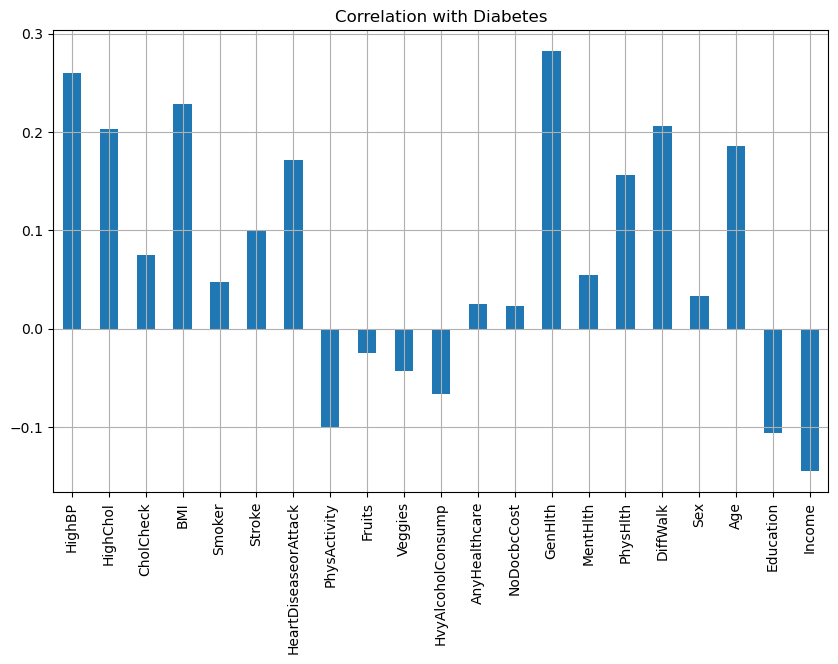

In [24]:
#Correlation plot with Diabetes
df_raw.drop('Diabetes_012', axis=1).corrwith(df_raw.Diabetes_012).plot(kind='bar', grid=True, figsize=(10, 6), title="Correlation with Diabetes")
plt.show();

#### **Observations from the above pairplot and correlations** 

1. Most of the diabetes people have high Blood Pressure (HighBP), high cholestrol (HighChol) and high BMI.
2. Both men and women are vulnerable to diabetes
3. Age groups most affected: 60-64, 65-70, 70-74.
4. Smoking and alcohol consumption have little effect on diabetes. 
5. Most of the diabetes people have less physical activity and difficulty walking.

##### **Additional Insights from the above correlation matrix** 

1. Poor general health is linked to both difficulty in walking and poorer physical health. 
2. Mental health is also affected similarly. 
3. Higher income levels might lead to better general health. 
4. BMI is positively correlated with Diabetes
5. HighChol and HighBP also have a positive correlation with Diabetes.



### Understanding the Task

After examining the description and data, the task is predicting diabetes and improving understanding of the relationship between lifestyle and diabetes in the US

In [25]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 227859 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          227859 non-null  float64
 1   HighBP                227859 non-null  float64
 2   HighChol              227859 non-null  float64
 3   CholCheck             227859 non-null  float64
 4   BMI                   227859 non-null  float64
 5   Smoker                227859 non-null  float64
 6   Stroke                227859 non-null  float64
 7   HeartDiseaseorAttack  227859 non-null  float64
 8   PhysActivity          227859 non-null  float64
 9   Fruits                227859 non-null  float64
 10  Veggies               227859 non-null  float64
 11  HvyAlcoholConsump     227859 non-null  float64
 12  AnyHealthcare         227859 non-null  float64
 13  NoDocbcCost           227859 non-null  float64
 14  GenHlth               227859 non-null  float64
 15  MentH

## Next Steps - 
### 2. Preparation for Predictive Modelling 

#### Preprocess data

1. Balance dataset
2. Transform data
3. Standardize data

#### Train and Test data split
Given the size of the dataset, spliting the data by 75:25 ratio
